In [348]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [532]:
# Build manual dataset
# y = 1.2*x -3.4*x**2 + 5.6*x**3 + 5
def build_dataset(num):
    w = torch.tensor([1.2, -3.4, 5.6]).view(3, 1)
    b = 5
    x = torch.randn((num, 1), dtype=torch.float)    # (num, 1)
    feature = torch.cat([x, x**2, x**3], dim=1)     # (num, 3)
    y = feature @ w + b                    # (num, 1)
    n = torch.normal(0, 0.01, y.shape)
    y += n
    return feature, y, n
    
features, y, n = build_dataset(100)
print(features[:5])
print(y[:5])
print(torch.mm(features[0].view(1, -1), torch.tensor([1.2, -3.4, 5.6]).view(3, 1)) + 5 + n[0])
print(torch.tensor(1.2) * features[0][0] - torch.tensor(3.4) * (features[0][1]) + torch.tensor(5.6) * (features[0][2]) + torch.tensor(5) + n[0])

tensor([[ 0.2077,  0.0431,  0.0090],
        [-1.3086,  1.7123, -2.2406],
        [-1.1727,  1.3751, -1.6126],
        [-0.8738,  0.7636, -0.6673],
        [ 2.0225,  4.0907,  8.2735]])
tensor([[  5.1401],
        [-14.9394],
        [-10.1151],
        [ -2.3738],
        [ 39.8506]])
tensor([[5.1401]])
tensor([5.1401])


In [347]:
print(features[0][0], features[0][1], features[0][2])
print(features[0][0], features[0][0]**2, features[0][0]**3)

tensor(0.5647) tensor(0.3189) tensor(0.1800)
tensor(0.5647) tensor(0.3189) tensor(0.1800)


# Considering model complexity

In [681]:
torch.manual_seed(42)
num = 10000
features, labels, _ = build_dataset(num)

# split into train set and test set
n1 = int(0.9 * num)
train_data, train_label = features[:n1], labels[:n1]
test_data, test_label = features[n1:], labels[n1:]

net = nn.Sequential(
    nn.Linear(3, 1)
)
torch.nn.init.normal_(net[0].weight, mean=0, std=0.01)
net[0].weight.data = net[0].weight.data * 0.0001
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001)
batch_size = 1024
losst = []
losse = []

for i in range(1000):
    ix = torch.randint(0, int(0.9*num), (batch_size, ))
    X, y = train_data[ix], train_label[ix]
    out = net(X)
    l = loss(out, y)
    
    # backward
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    
    # track stat
    losst.append(loss(net(train_data), train_label).item())
    losse.append(loss(net(test_data), test_label).item())
    print(f'epoch {i :7d}, train loss {losst[-1] : 10f}, test loss {losse[-1] : 10f}')
    

epoch       0, train loss  494.798157, test loss  487.547089
epoch       1, train loss  462.548004, test loss  455.060699
epoch       2, train loss  425.831696, test loss  418.182404
epoch       3, train loss  400.306580, test loss  392.362152
epoch       4, train loss  381.202515, test loss  373.180115
epoch       5, train loss  358.071991, test loss  349.959320
epoch       6, train loss  333.285461, test loss  325.189209
epoch       7, train loss  313.270691, test loss  305.056854
epoch       8, train loss  296.254913, test loss  288.006073
epoch       9, train loss  282.476837, test loss  274.307495
epoch      10, train loss  265.258545, test loss  257.231537
epoch      11, train loss  251.587219, test loss  243.615158
epoch      12, train loss  239.268280, test loss  231.354187
epoch      13, train loss  224.645187, test loss  216.861435
epoch      14, train loss  213.865494, test loss  206.122238
epoch      15, train loss  204.796402, test loss  197.111282
epoch      16, train los

In [682]:
print(list(net[0].parameters()))

[Parameter containing:
tensor([[ 1.1676, -2.6210,  5.6102]], requires_grad=True), Parameter containing:
tensor([3.1449], requires_grad=True)]


Text(0.5, 1.0, 'under fitting')

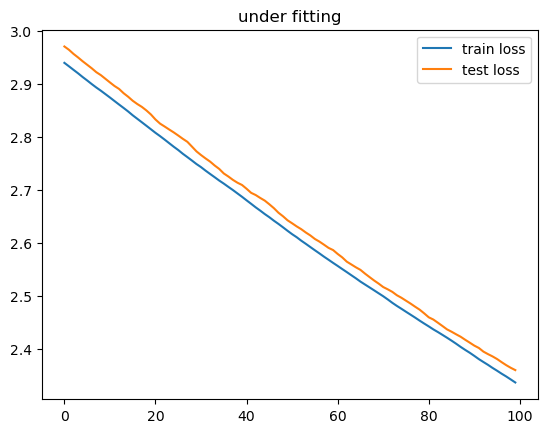

In [683]:
plt.plot(losst[-100:])
plt.plot(losse[-100:])
plt.legend(["train loss", "test loss"])
plt.title("under fitting")

In [684]:
torch.manual_seed(42)
num = 100000
features, labels, _ = build_dataset(num)

# split into train set and test set
n1 = int(0.9 * num)
train_data, train_label = features[:n1], labels[:n1]
test_data, test_label = features[n1:], labels[n1:]

net = nn.Sequential(
    nn.Linear(3, 256), nn.ReLU(),
    nn.Linear(256, 128), nn.ReLU(),
    nn.Linear(128, 1)
)
torch.nn.init.normal_(net[0].weight, mean=0, std=0.01)
net[0].weight.data = net[0].weight.data * 0.1
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.0001)
batch_size = 1024
losst = []
losse = []

for i in range(1000):
    ix = torch.randint(0, int(0.9*num), (batch_size, ))
    X, y = train_data[ix], train_label[ix]
    out = net(X)
    l = loss(out, y)
    
    # backward
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    
     # track stat
    losst.append(loss(net(train_data), train_label).item())
    losse.append(loss(net(test_data), test_label).item())
    print(f'epoch {i :7d}, train loss {losst[-1] : 10f}, test loss {losse[-1] : 10f}')
    

epoch       0, train loss  557.301758, test loss  533.714417
epoch       1, train loss  557.219360, test loss  533.632324
epoch       2, train loss  557.146423, test loss  533.559326
epoch       3, train loss  557.083252, test loss  533.496704
epoch       4, train loss  556.992981, test loss  533.407043
epoch       5, train loss  556.883179, test loss  533.299255
epoch       6, train loss  556.807190, test loss  533.224792
epoch       7, train loss  556.747375, test loss  533.166016
epoch       8, train loss  556.660217, test loss  533.080627
epoch       9, train loss  556.598633, test loss  533.019226
epoch      10, train loss  556.528198, test loss  532.948914
epoch      11, train loss  556.469666, test loss  532.890503
epoch      12, train loss  556.403931, test loss  532.824768
epoch      13, train loss  556.329895, test loss  532.751831
epoch      14, train loss  556.264709, test loss  532.687622
epoch      15, train loss  556.209717, test loss  532.633484
epoch      16, train los

Text(0.5, 1.0, 'Over fitting')

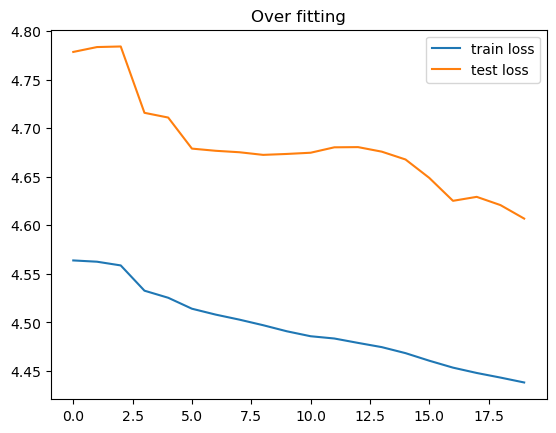

In [685]:
plt.plot(losst[-20:])
plt.plot(losse[-20:])
plt.legend(["train loss", "test loss"])
plt.title("Over fitting")

# Consider scale of dataset

In [686]:
torch.manual_seed(42)
num = 10
features, labels, _ = build_dataset(num)

# split into train set and test set
n1 = int(0.9 * num)
train_data, train_label = features[:n1], labels[:n1]
test_data, test_label = features[n1:], labels[n1:]

net = nn.Sequential(
    nn.Linear(3, 1)
)
torch.nn.init.normal_(net[0].weight, mean=0, std=0.01)
net[0].weight.data = net[0].weight.data * 0.0001
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001)
batch_size = 2
losst = []
losse = []

for i in range(100):
    ix = torch.randint(0, int(0.9*num), (batch_size, ))
    X, y = train_data[ix], train_label[ix]
    out = net(X)
    l = loss(out, y)
    
    # backward
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    
    # track stat
    losst.append(loss(net(train_data), train_label).item())
    losse.append(loss(net(test_data), test_label).item())
    print(f'epoch {i :7d}, train loss {losst[-1] : 10f}, test loss {losse[-1] : 10f}')
    

epoch       0, train loss  310.627380, test loss  21.639986
epoch       1, train loss  309.496826, test loss  21.697577
epoch       2, train loss  309.356323, test loss  21.616728
epoch       3, train loss  309.187683, test loss  21.534630
epoch       4, train loss  308.941986, test loss  21.443172
epoch       5, train loss  308.829987, test loss  21.390507
epoch       6, train loss  308.616180, test loss  21.306969
epoch       7, train loss  229.756271, test loss  20.272614
epoch       8, train loss  229.776611, test loss  20.258459
epoch       9, train loss  229.427322, test loss  20.166573
epoch      10, train loss  229.447510, test loss  20.152615
epoch      11, train loss  229.352219, test loss  20.102571
epoch      12, train loss  229.168869, test loss  20.018507
epoch      13, train loss  228.922363, test loss  19.937801
epoch      14, train loss  170.682480, test loss  19.175705
epoch      15, train loss  170.502838, test loss  19.093853
epoch      16, train loss  169.671722, t

Text(0.5, 1.0, 'Over fitting')

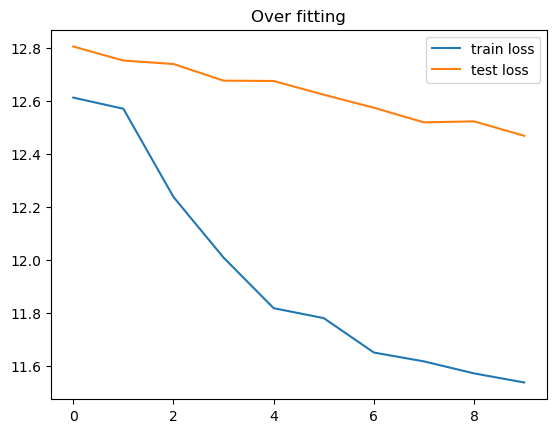

In [687]:
plt.plot(losst[-10:])
plt.plot(losse[-10:])
plt.legend(["train loss", "test loss"])
plt.title("Over fitting")

# Tragedies for over fitting

## Question? why 2 results of l2 are different

In [713]:
# Weight decay
torch.manual_seed(42)
num = 10
features, labels, _ = build_dataset(num)

# split into train set and test set
n1 = int(0.9 * num)
train_data, train_label = features[:n1], labels[:n1]
test_data, test_label = features[n1:], labels[n1:]

net = nn.Sequential(
    nn.Linear(3, 1)
)
torch.nn.init.normal_(net[0].weight, mean=0, std=0.01)
net[0].weight.data = net[0].weight.data * 0.0001
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001)
batch_size = 2
losst = []
losse = []

for i in range(100):
    ix = torch.randint(0, int(0.9*num), (batch_size, ))
    X, y = train_data[ix], train_label[ix]
    out = net(X)
    l2 = 0.0
    for layer in net:
        l2 += (layer.weight ** 2).sum()
    l = loss(out, y) + l2 * 1 / batch_size
    
    # backward
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    
    # track stat
    losst.append(loss(net(train_data), train_label).item())
    losse.append(loss(net(test_data), test_label).item())
    print(f'epoch {i :7d}, train loss {losst[-1] : 10f}, test loss {losse[-1] : 10f}')
    

epoch       0, train loss  310.627380, test loss  21.639986
epoch       1, train loss  309.496979, test loss  21.697586
epoch       2, train loss  309.357819, test loss  21.616758
epoch       3, train loss  309.190552, test loss  21.534687
epoch       4, train loss  308.946228, test loss  21.443251
epoch       5, train loss  308.835785, test loss  21.390615
epoch       6, train loss  308.623535, test loss  21.307114
epoch       7, train loss  229.763046, test loss  20.272778
epoch       8, train loss  229.856827, test loss  20.259180
epoch       9, train loss  229.580704, test loss  20.167845
epoch      10, train loss  229.674240, test loss  20.154449
epoch      11, train loss  229.652206, test loss  20.104967
epoch      12, train loss  229.541962, test loss  20.021456
epoch      13, train loss  229.368469, test loss  19.941298
epoch      14, train loss  171.070236, test loss  19.178858
epoch      15, train loss  171.006256, test loss  19.098000
epoch      16, train loss  170.288910, t

Text(0.5, 1.0, 'l2 regularization')

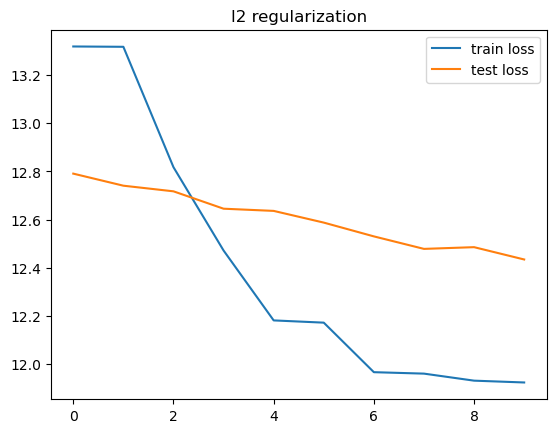

In [714]:
plt.plot(losst[-10:])
plt.plot(losse[-10:])
plt.legend(["train loss", "test loss"])
plt.title("l2 regularization")

In [711]:
torch.manual_seed(42)
num = 10
features, labels, _ = build_dataset(num)

# split into train set and test set
n1 = int(0.9 * num)
train_data, train_label = features[:n1], labels[:n1]
test_data, test_label = features[n1:], labels[n1:]

net = nn.Sequential(
    nn.Linear(3, 1)
)
torch.nn.init.normal_(net[0].weight, mean=0, std=0.01)
net[0].weight.data = net[0].weight.data * 0.0001
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001, weight_decay= 1)
batch_size = 2
losst = []
losse = []

for i in range(100):
    ix = torch.randint(0, int(0.9*num), (batch_size, ))
    X, y = train_data[ix], train_label[ix]
    out = net(X)
    l = loss(out, y)
    
    # backward
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    
    # track stat
    losst.append(loss(net(train_data), train_label).item())
    losse.append(loss(net(test_data), test_label).item())
    print(f'epoch {i :7d}, train loss {losst[-1] : 10f}, test loss {losse[-1] : 10f}')
    

epoch       0, train loss  310.635406, test loss  21.644781
epoch       1, train loss  309.513245, test loss  21.707266
epoch       2, train loss  309.382080, test loss  21.631199
epoch       3, train loss  309.222870, test loss  21.553930
epoch       4, train loss  308.986725, test loss  21.467339
epoch       5, train loss  308.884583, test loss  21.419636
epoch       6, train loss  308.680542, test loss  21.341059
epoch       7, train loss  229.816345, test loss  20.310776
epoch       8, train loss  229.918625, test loss  20.302584
epoch       9, train loss  229.650467, test loss  20.216539
epoch      10, train loss  229.752716, test loss  20.208603
epoch      11, train loss  229.739120, test loss  20.164516
epoch      12, train loss  229.637131, test loss  20.086348
epoch      13, train loss  229.471756, test loss  20.011585
epoch      14, train loss  171.162979, test loss  19.253222
epoch      15, train loss  171.106873, test loss  19.177961
epoch      16, train loss  170.398651, t

Text(0.5, 1.0, 'l2 regularization')

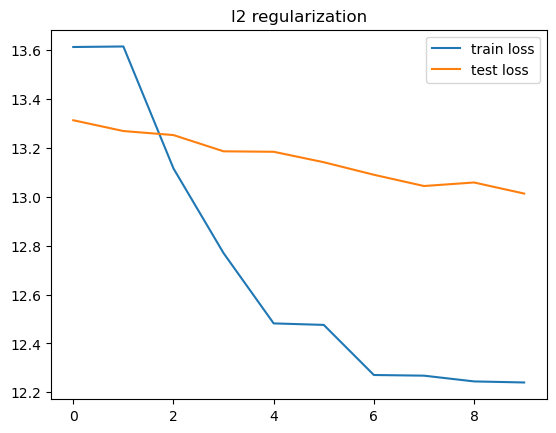

In [712]:
plt.plot(losst[-10:])
plt.plot(losse[-10:])
plt.legend(["train loss", "test loss"])
plt.title("l2 regularization")

In [700]:
# Dropout
class DropoutLayer(nn.Module):
    def __init__(self, drop_prob):
        super().__init__()
        assert 0 <= drop_prob <= 1
        self.drop = drop_prob   # prob to be dropped
    
    def forward(self, x):
        # train mode
        if self.training:
            prob_keep = 1 - self.drop
            if prob_keep == 0:
                x = torch.zeros(x.shape)
            else:
                mask = torch.rand(x.shape) >= prob_keep
                x = x * mask / prob_keep 
        return x

p = 0.4
dropout = DropoutLayer(p)
dropout2 = nn.Dropout(p)
a = torch.randn(2, 3)
b = a.clone()
c = b.clone()
print(a)
print(dropout(a))
print(dropout2(b))

# In eval mode, nn.dropout don't scale the data
dropout2.eval()
print(dropout2(c))

tensor([[ 0.9009,  1.0572, -0.9367],
        [-0.1063, -0.5441,  0.1099]])
tensor([[ 1.5015,  0.0000, -0.0000],
        [-0.1771, -0.0000,  0.0000]])
tensor([[ 1.5015,  1.7619, -1.5612],
        [-0.1771, -0.0000,  0.1832]])
tensor([[ 0.9009,  1.0572, -0.9367],
        [-0.1063, -0.5441,  0.1099]])


In [707]:
torch.manual_seed(42)
num = 100000
features, labels, _ = build_dataset(num)

# split into train set and test set
n1 = int(0.9 * num)
train_data, train_label = features[:n1], labels[:n1]
test_data, test_label = features[n1:], labels[n1:]

net = nn.Sequential(
    nn.Linear(3, 256), nn.ReLU(), DropoutLayer(0.5),
    nn.Linear(256, 128), nn.ReLU(), DropoutLayer(0.5),
    nn.Linear(128, 1)
)
torch.nn.init.normal_(net[0].weight, mean=0, std=0.01)
net[0].weight.data = net[0].weight.data * 0.1
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.0001)
batch_size = 1024
losst = []
losse = []

for i in range(1000):
    net.train()
    ix = torch.randint(0, int(0.9*num), (batch_size, ))
    X, y = train_data[ix], train_label[ix]
    out = net(X)
    l = loss(out, y)
    
    # backward
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    
     # track stat
    net.eval()
    losst.append(loss(net(train_data), train_label).item())
    losse.append(loss(net(test_data), test_label).item())
    print(f'epoch {i :7d}, train loss {losst[-1] : 10f}, test loss {losse[-1] : 10f}')
    

epoch       0, train loss  557.337891, test loss  533.749817
epoch       1, train loss  557.288696, test loss  533.700684
epoch       2, train loss  557.227722, test loss  533.640625
epoch       3, train loss  557.167542, test loss  533.581421
epoch       4, train loss  557.117676, test loss  533.532593
epoch       5, train loss  557.043579, test loss  533.459351
epoch       6, train loss  556.993774, test loss  533.409546
epoch       7, train loss  556.893616, test loss  533.311218
epoch       8, train loss  556.823486, test loss  533.241699
epoch       9, train loss  556.773743, test loss  533.192566
epoch      10, train loss  556.715393, test loss  533.134827
epoch      11, train loss  556.662842, test loss  533.083069
epoch      12, train loss  556.602600, test loss  533.022583
epoch      13, train loss  556.550476, test loss  532.971313
epoch      14, train loss  556.498291, test loss  532.918274
epoch      15, train loss  556.444885, test loss  532.865295
epoch      16, train los

Text(0.5, 1.0, 'Drop out')

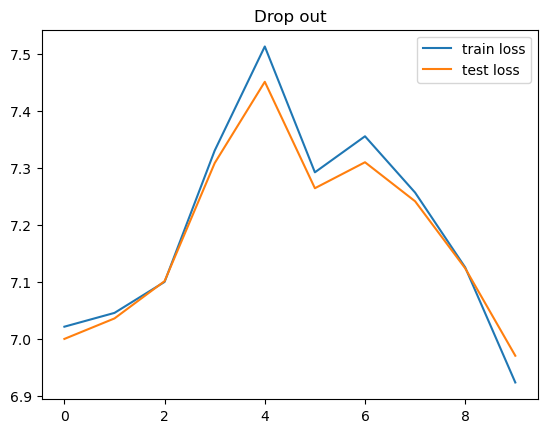

In [708]:
plt.plot(losst[-10:])
plt.plot(losse[-10:])
plt.legend(["train loss", "test loss"])
plt.title("Drop out")

In [709]:
torch.manual_seed(42)
num = 100000
features, labels, _ = build_dataset(num)

# split into train set and test set
n1 = int(0.9 * num)
train_data, train_label = features[:n1], labels[:n1]
test_data, test_label = features[n1:], labels[n1:]

net = nn.Sequential(
    nn.Linear(3, 256), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(256, 128), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(128, 1)
)
torch.nn.init.normal_(net[0].weight, mean=0, std=0.01)
net[0].weight.data = net[0].weight.data * 0.1
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.0001)
batch_size = 1024
losst = []
losse = []

for i in range(1000):
    net.train()
    ix = torch.randint(0, int(0.9*num), (batch_size, ))
    X, y = train_data[ix], train_label[ix]
    out = net(X)
    l = loss(out, y)
    
    # backward
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    
     # track stat
    net.eval()
    losst.append(loss(net(train_data), train_label).item())
    losse.append(loss(net(test_data), test_label).item())
    print(f'epoch {i :7d}, train loss {losst[-1] : 10f}, test loss {losse[-1] : 10f}')
    

epoch       0, train loss  557.329285, test loss  533.741272
epoch       1, train loss  557.266479, test loss  533.678650
epoch       2, train loss  557.212891, test loss  533.624756
epoch       3, train loss  557.161316, test loss  533.573914
epoch       4, train loss  557.097290, test loss  533.510376
epoch       5, train loss  557.010071, test loss  533.425171
epoch       6, train loss  556.957397, test loss  533.373047
epoch       7, train loss  556.913269, test loss  533.329590
epoch       8, train loss  556.842651, test loss  533.260376
epoch       9, train loss  556.798035, test loss  533.215820
epoch      10, train loss  556.741577, test loss  533.159241
epoch      11, train loss  556.696167, test loss  533.114319
epoch      12, train loss  556.640991, test loss  533.059326
epoch      13, train loss  556.582581, test loss  533.001953
epoch      14, train loss  556.526062, test loss  532.946594
epoch      15, train loss  556.482483, test loss  532.903564
epoch      16, train los

Text(0.5, 1.0, 'nn.Dropout')

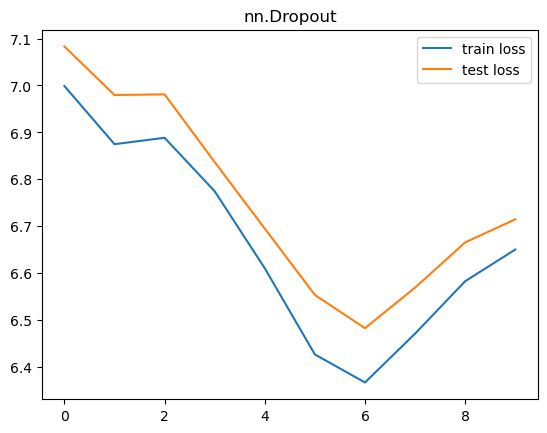

In [710]:
plt.plot(losst[-10:])
plt.plot(losse[-10:])
plt.legend(["train loss", "test loss"])
plt.title("nn.Dropout")